In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import scipy.stats as stats

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


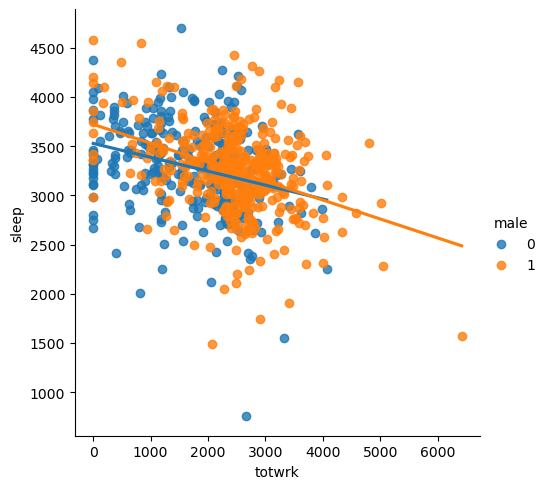

In [5]:
# ci-доверительный интервал
# hue - сортировка по определенной переменной
sns.lmplot(data=df, x='totwrk', y='sleep', ci=None, hue='male')

In [8]:
#Разбиваем датасет на 2 разных для проведения теста "Чоу"
# Определим датафрейм
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по гендерному признаку
sleep_male = sleep_df[sleep_df['male']==1] # Датафрейм для мужчин
sleep_female = sleep_df[sleep_df['male']==0] # Датафрейм дла женщин

In [9]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

In [11]:
F_obs = (slp.ssr - (slp_ml.ssr+slp_fml.ssr))/(slp_ml.ssr+slp_fml.ssr)*(len(sleep_male)+len(sleep_female)-2*7)/(7)
F_obs

1.550614737699912

In [14]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_ml.ssr.round(2)},RSS_2:{slp_ml.ssr.round(2)}')

RSS:33859.8, RSS_1:17618.98,RSS_2:17618.98 


In [16]:
alpha = 0.01
stats.f.ppf(1-alpha, 7,len(sleep_female) + len(sleep_male) - 2*7)

2.6651528022423494

### Вывод:
$F_{obs}<F_{cr}$, данные согласуются с нулевой гипотезой. Структурные различия незначимы

# List_6

In [17]:
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import re # эта библиотека необходима для работы с регулярными выражениями

In [19]:
data_string = '''totwrk                       -0.169***         
                              (0.018)          
                                               
age                           2.689*           
                              (1.469)          
                                               
south                        101.568**         
                             (41.837)          
                                               
male                         87.669**          
                             (35.104)          
                                               
smsa                         -54.748*          
                             (33.123)          
                                               
yngkid                        -13.962          
                             (50.341)          
                                               
marr                          31.211           
                             (42.233)          
                                               
Constant                    3450.913***        
                             (80.726)  '''

In [20]:
# Строку с данными можно разбить на 8 подстрок в 3 мя элементами в каждой, разделённых различными количеством пробелом.
# С этим справится метод reshape() из библиотеки numpy
# strip - удаляет из строки все ненужные элементы
# split - размещает отдельно по отдельным строкам
np.reshape(data_string.strip().split(), (8,3))

array([['totwrk', '-0.169***', '(0.018)'],
       ['age', '2.689*', '(1.469)'],
       ['south', '101.568**', '(41.837)'],
       ['male', '87.669**', '(35.104)'],
       ['smsa', '-54.748*', '(33.123)'],
       ['yngkid', '-13.962', '(50.341)'],
       ['marr', '31.211', '(42.233)'],
       ['Constant', '3450.913***', '(80.726)']], dtype='<U11')

In [23]:
df = pd.DataFrame(np.reshape(data_string.strip().split(), (8,3) ), columns=['Coeff','Est str','std.err. str'])
df

,Coeff,Est str,std.err. str
0,totwrk,-0.169***,(0.018)
1,age,2.689*,(1.469)
2,south,101.568**,(41.837)
3,male,87.669**,(35.104)
4,smsa,-54.748*,(33.123)
5,yngkid,-13.962,(50.341)
6,marr,31.211,(42.233)
7,Constant,3450.913***,(80.726)


In [24]:
# оценки. str(- строка).extract( - извлекает), astype - преобразование в число
df['Estimate_numb'] = df['Est str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
# ошибки
df['Std.error'] = df['std.err. str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
df

,Coeff,Est str,std.err. str,Estimate_numb,Std.error
0,totwrk,-0.169***,(0.018),-0.169,0.018
1,age,2.689*,(1.469),2.689,1.469
2,south,101.568**,(41.837),101.568,41.837
3,male,87.669**,(35.104),87.669,35.104
4,smsa,-54.748*,(33.123),-54.748,33.123
5,yngkid,-13.962,(50.341),-13.962,50.341
6,marr,31.211,(42.233),31.211,42.233
7,Constant,3450.913***,(80.726),3450.913,80.726


In [26]:
alpha = 0.1
t_cr=stats.t.ppf(1-alpha/2, 706-8)
t_cr

1.6470395952054095

In [28]:
df['low']=df['Estimate_numb']-t_cr*df['Std.error']
df['up']=df['Estimate_numb']+t_cr*df['Std.error']
df

,Coeff,Est str,std.err. str,Estimate_numb,Std.error,low,up
0,totwrk,-0.169***,(0.018),-0.169,0.018,-0.198647,-0.139353
1,age,2.689*,(1.469),2.689,1.469,0.269499,5.108501
2,south,101.568**,(41.837),101.568,41.837,32.660804,170.475196
3,male,87.669**,(35.104),87.669,35.104,29.851322,145.486678
4,smsa,-54.748*,(33.123),-54.748,33.123,-109.302893,-0.193107
5,yngkid,-13.962,(50.341),-13.962,50.341,-96.875620,68.951620
6,marr,31.211,(42.233),31.211,42.233,-38.348423,100.770423
7,Constant,3450.913***,(80.726),3450.913,80.726,3317.954082,3583.871918
